In [1]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('../AVblackFriday/train.csv')
test = pd.read_csv('../AVblackFriday/test.csv')

In [2]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [3]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


(array([ 15102.,  99660.,      0., 219587.,      0., 110013.,  45701.,
             0.,  38501.,  21504.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

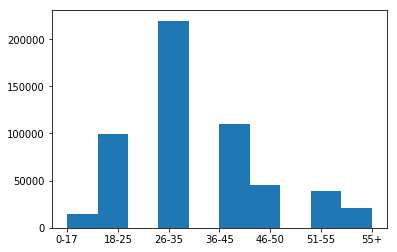

In [5]:
########################################
plt.hist(train['Age'])

In [6]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [7]:
train['Product_ID'].nunique()

3631

In [8]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [9]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [10]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [11]:
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

# Converting Categorical variables into labels

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
def PreProcess(df):
    df['productID'] = lb.fit_transform(df['Product_ID'])
    df['gender'] = lb.fit_transform(df['Gender'])
    df['age'] = lb.fit_transform(df['Age'])
    df['city'] = lb.fit_transform(df['City_Category'])
    df['cityYears'] = lb.fit_transform(df['Stay_In_Current_City_Years'])


In [13]:
PreProcess(train)
train = train.drop(['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'], 1)
train.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
productID               int64
gender                  int64
age                     int64
city                    int64
cityYears               int64
dtype: object

In [14]:
PreProcess(test)
yproductID = test['Product_ID']
test = test.drop(['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'], 1)
test.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
productID               int64
gender                  int64
age                     int64
city                    int64
cityYears               int64
dtype: object

# Taking up Product_Categories

In [15]:
train.apply(lambda x: sum(x.isnull()))

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
productID                  0
gender                     0
age                        0
city                       0
cityYears                  0
dtype: int64

In [16]:
#import numpy as np
#train['Product_Category_2'] = train['Product_Category_2'].astype(np.int64)

In [17]:
train[['Product_Category_1','Product_Category_2',"Product_Category_3"]].sample(10)

,Product_Category_1,Product_Category_2,Product_Category_3
51485,1,2.0,16.0
436289,5,NaN,NaN
481433,1,15.0,16.0
13671,1,2.0,11.0
267796,7,NaN,NaN
280904,5,8.0,NaN
374986,1,6.0,16.0
493667,5,8.0,NaN
216565,8,16.0,NaN
227970,8,NaN,NaN


In [18]:
train[train['Product_Category_2'].isnull()].head(10)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,productID,gender,age,city,cityYears
0,1000001,10,0,3,NaN,NaN,8370,672,0,0,0,2
2,1000001,10,0,12,NaN,NaN,1422,852,0,0,0,2
4,1000002,16,0,8,NaN,NaN,7969,2734,1,6,2,4
9,1000005,20,1,8,NaN,NaN,7871,2631,1,2,0,1
11,1000005,20,1,8,NaN,NaN,3957,140,1,2,0,1
12,1000005,20,1,8,NaN,NaN,6073,307,1,2,0,1
21,1000008,12,1,8,NaN,NaN,9872,1469,1,2,2,4
22,1000008,12,1,8,NaN,NaN,9743,2029,1,2,2,4
23,1000008,12,1,8,NaN,NaN,5982,2036,1,2,2,4
26,1000009,17,0,8,NaN,NaN,5887,391,1,2,2,0


In [19]:
train['productID'][train['Product_Category_2'].isnull()].unique()

array([ 672,  852, 2734, ..., 3560, 3566, 3565], dtype=int64)

In [20]:
len(train['productID'][train['Product_Category_2'].isnull()].unique())
#indicates that 

1828

In [21]:
#find user_ID is different, productID is same and product_Category_2 is NaN
#train['Product_Category_2'][train['productID'] ==]
train2 = train
len(train[['User_ID', 'productID', 'Product_Category_2']][train['productID'] == train2['productID']][train['User_ID'] != train2['User_ID']][train['Product_Category_2'].isnull()])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0

In [22]:
train[train['Product_Category_3'].isnull()].head(10)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,productID,gender,age,city,cityYears
0,1000001,10,0,3,NaN,NaN,8370,672,0,0,0,2
2,1000001,10,0,12,NaN,NaN,1422,852,0,0,0,2
3,1000001,10,0,12,14.0,NaN,1057,828,0,0,0,2
4,1000002,16,0,8,NaN,NaN,7969,2734,1,6,2,4
5,1000003,15,0,1,2.0,NaN,15227,1831,1,2,0,3
7,1000004,7,1,1,15.0,NaN,15854,3320,1,4,1,2
8,1000004,7,1,1,16.0,NaN,15686,3604,1,4,1,2
9,1000005,20,1,8,NaN,NaN,7871,2631,1,2,0,1
10,1000005,20,1,5,11.0,NaN,5254,2398,1,2,0,1
11,1000005,20,1,8,NaN,NaN,3957,140,1,2,0,1


In [23]:
len(train['User_ID'][train['Product_Category_3'].isnull()])

383247

In [24]:
len(train[train['Product_Category_3'].isnull()][train['Product_Category_2'].isnull()])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


173638

In [25]:
train[['Product_Category_3']][train['Product_Category_2'].isnull()].sum()
#this proves all rows where Product_Category_2 is null, Product_Category_3 is also null

Product_Category_3    0.0
dtype: float64

In [26]:
train.shape

(550068, 12)

**1. Removing all NaNs**

In [27]:
#train2 = train[train['Product_Category_2'].notnull()]
#train2 has null values only in Product_Category_3

In [28]:
train2 = train

In [29]:
train2.shape

(550068, 12)

In [30]:
550068-173638

376430

In [31]:
#train2.head(10)

In [32]:
train2.fillna(0, inplace=True)

In [33]:
train2.head(10)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,productID,gender,age,city,cityYears
0,1000001,10,0,3,0.0,0.0,8370,672,0,0,0,2
1,1000001,10,0,1,6.0,14.0,15200,2376,0,0,0,2
2,1000001,10,0,12,0.0,0.0,1422,852,0,0,0,2
3,1000001,10,0,12,14.0,0.0,1057,828,0,0,0,2
4,1000002,16,0,8,0.0,0.0,7969,2734,1,6,2,4
5,1000003,15,0,1,2.0,0.0,15227,1831,1,2,0,3
6,1000004,7,1,1,8.0,17.0,19215,1745,1,4,1,2
7,1000004,7,1,1,15.0,0.0,15854,3320,1,4,1,2
8,1000004,7,1,1,16.0,0.0,15686,3604,1,4,1,2
9,1000005,20,1,8,0.0,0.0,7871,2631,1,2,0,1


In [34]:
train2.apply(lambda x: sum(x.isnull()))

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
productID             0
gender                0
age                   0
city                  0
cityYears             0
dtype: int64

In [35]:
train2[['User_ID','Purchase']].sample(10)

,User_ID,Purchase
218426,1003690,11970
365779,1002239,6930
209372,1002215,7015
274576,1000305,1708
158705,1000533,4441
211970,1002753,8061
304190,1004834,5277
336401,1003796,7087
362615,1001805,11557
366227,1002335,765


In [36]:
#train2.boxplot(column = 'Purchase', by = 'gender')

In [37]:
#%time train2.plot(kind='density', subplots=True, layout=(4,3))

**Working in test dataset**

In [38]:
test.shape

(233599, 11)

In [39]:
test.fillna(0, inplace=True)

In [40]:
test.shape

(233599, 11)

# Model training

In [41]:
train2[:-1].sample()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,productID,gender,age,city,cityYears
422344,1004994,17,0,16,0.0,0.0,20462,2443,1,4,1,4


In [42]:
ytrain2 = train2['Purchase']
print(ytrain2.shape)
Xtrain2 = train2.iloc[:, train2.columns != 'Purchase']
print(Xtrain2.shape)

(550068,)
(550068, 11)


In [43]:
Xtrain2.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
productID               int64
gender                  int64
age                     int64
city                    int64
cityYears               int64
dtype: object

In [44]:
Xtest2 = test
Xtest2.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
productID               int64
gender                  int64
age                     int64
city                    int64
cityYears               int64
dtype: object

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor()

In [46]:
%time gbrt.fit(Xtrain2,ytrain2)

Wall time: 52.5 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [47]:
%time ypred = gbrt.predict(Xtest2)

Wall time: 407 ms


In [48]:
output = pd.DataFrame(columns=['User_ID', 'Product_ID', 'Purchase'])
output.dtypes

User_ID       object
Product_ID    object
Purchase      object
dtype: object

In [49]:
output['User_ID'] = Xtest2['User_ID']
output['Product_ID'] = yproductID 
output['Purchase'] = ypred

In [50]:
output.to_csv('m1.csv', index=False)